In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_keys

# Import the datetime module from the datatime library
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

591

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?id={city id}&appid=" + weather_api_keys
print(url)

http://api.openweathermap.org/data/2.5/weather?id={city id}&appid=d2c9d2493e0412e81cec53bf032ff101


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | tagusao
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | saint george
Processing Record 6 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 7 of Set 1 | maseru
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | marrakesh
Processing Record 10 of Set 1 | goure
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | harper
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | caravelas
Processing Record 16 of Set 1 | pisco
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | udachnyy
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | abnub
Processing Record 21 of Set 1 | kozhva
Processing Record 22 of Set 1 | 

Processing Record 37 of Set 4 | umm lajj
Processing Record 38 of Set 4 | dingle
Processing Record 39 of Set 4 | bilibino
Processing Record 40 of Set 4 | east london
Processing Record 41 of Set 4 | saint-joseph
Processing Record 42 of Set 4 | tadepallegudem
Processing Record 43 of Set 4 | santa fe
Processing Record 44 of Set 4 | stornoway
Processing Record 45 of Set 4 | aklavik
Processing Record 46 of Set 4 | adrar
Processing Record 47 of Set 4 | viligili
City not found. Skipping...
Processing Record 48 of Set 4 | tasiilaq
Processing Record 49 of Set 4 | shimoda
Processing Record 50 of Set 4 | laguna
Processing Record 1 of Set 5 | marcona
City not found. Skipping...
Processing Record 2 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 5 | wetzlar
Processing Record 4 of Set 5 | kinsale
Processing Record 5 of Set 5 | isangel
Processing Record 6 of Set 5 | palmer
Processing Record 7 of Set 5 | leningradskiy
Processing Record 8 of Set 5 | dawei
Processing Record 

Processing Record 22 of Set 8 | henties bay
Processing Record 23 of Set 8 | qandala
Processing Record 24 of Set 8 | aykino
Processing Record 25 of Set 8 | toliary
City not found. Skipping...
Processing Record 26 of Set 8 | solnechnyy
Processing Record 27 of Set 8 | oussouye
Processing Record 28 of Set 8 | paamiut
Processing Record 29 of Set 8 | dubbo
Processing Record 30 of Set 8 | oranjemund
Processing Record 31 of Set 8 | stanislav
Processing Record 32 of Set 8 | atambua
Processing Record 33 of Set 8 | miri
Processing Record 34 of Set 8 | maloshuyka
City not found. Skipping...
Processing Record 35 of Set 8 | skagastrond
City not found. Skipping...
Processing Record 36 of Set 8 | moerai
Processing Record 37 of Set 8 | egvekinot
Processing Record 38 of Set 8 | tahoua
Processing Record 39 of Set 8 | kahului
Processing Record 40 of Set 8 | klaksvik
Processing Record 41 of Set 8 | hay river
Processing Record 42 of Set 8 | flinders
Processing Record 43 of Set 8 | kieta
Processing Record 44

Processing Record 11 of Set 12 | carora
Processing Record 12 of Set 12 | saint-augustin
Processing Record 13 of Set 12 | beausejour
Processing Record 14 of Set 12 | nishihara
Processing Record 15 of Set 12 | juifang
City not found. Skipping...
Processing Record 16 of Set 12 | husavik
Processing Record 17 of Set 12 | sterling
Processing Record 18 of Set 12 | port-cartier
Processing Record 19 of Set 12 | marawi
Processing Record 20 of Set 12 | corinto
Processing Record 21 of Set 12 | houma
Processing Record 22 of Set 12 | port-gentil
Processing Record 23 of Set 12 | santa cruz
Processing Record 24 of Set 12 | khonuu
City not found. Skipping...
Processing Record 25 of Set 12 | safaga
Processing Record 26 of Set 12 | wick
Processing Record 27 of Set 12 | college
Processing Record 28 of Set 12 | freeport
Processing Record 29 of Set 12 | grand gaube
Processing Record 30 of Set 12 | lashio
Processing Record 31 of Set 12 | baykit
Processing Record 32 of Set 12 | mgandu
Processing Record 33 of 

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,281.53,74,0,1.83,AU,2021-09-21 19:44:50
1,Tagusao,9.1924,117.8141,298.04,89,100,2.99,PH,2021-09-21 19:44:51
2,Cape Town,-33.9258,18.4232,287.66,77,0,1.34,ZA,2021-09-21 19:40:44
3,Bethel,41.3712,-73.4140,297.79,73,75,0.45,US,2021-09-21 19:41:11
4,Saint George,37.1041,-113.5841,304.41,15,1,0.89,US,2021-09-21 19:41:18
5,Maseru,-29.3167,27.4833,285.18,15,97,1.68,LS,2021-09-21 19:43:54
6,Avarua,-21.2078,-159.7750,298.18,78,75,2.06,CK,2021-09-21 19:44:52
7,Marrakesh,31.6315,-8.0083,300.19,50,0,5.14,MA,2021-09-21 19:41:34
8,Goure,13.9835,10.2704,305.38,26,94,2.91,NE,2021-09-21 19:44:52
9,Port Elizabeth,-33.9180,25.5701,284.32,81,20,0.87,ZA,2021-09-21 19:44:52


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

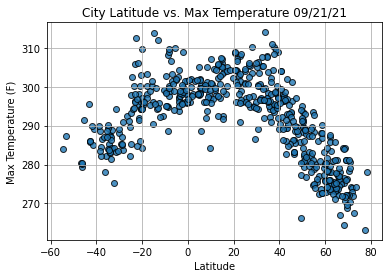

In [10]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

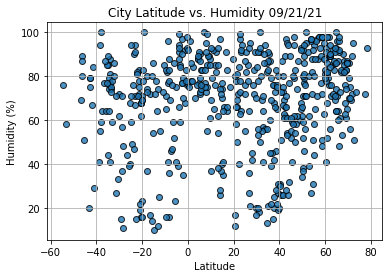

In [11]:
  # Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

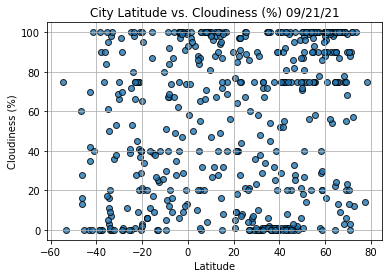

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

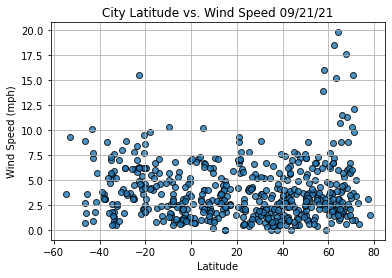

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [55]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [56]:
index13 = city_data_df.loc[13]
index13

City                        Pisco
Lat                         -13.7
Lng                      -76.2167
Max Temp                   294.18
Humidity                       64
Cloudiness                      0
Wind Speed                   4.63
Country                        PE
Date          2021-09-21 19:44:53
Name: 13, dtype: object

In [57]:
city_data_df["Lat"] >= 0


0      False
1       True
2      False
3       True
4       True
       ...  
535     True
536    False
537     True
538     True
539    False
Name: Lat, Length: 540, dtype: bool

In [58]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Tagusao,9.1924,117.8141,298.04,89,100,2.99,PH,2021-09-21 19:44:51
3,Bethel,41.3712,-73.4140,297.79,73,75,0.45,US,2021-09-21 19:41:11
4,Saint George,37.1041,-113.5841,304.41,15,1,0.89,US,2021-09-21 19:41:18
7,Marrakesh,31.6315,-8.0083,300.19,50,0,5.14,MA,2021-09-21 19:41:34
8,Goure,13.9835,10.2704,305.38,26,94,2.91,NE,2021-09-21 19:44:52


In [59]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

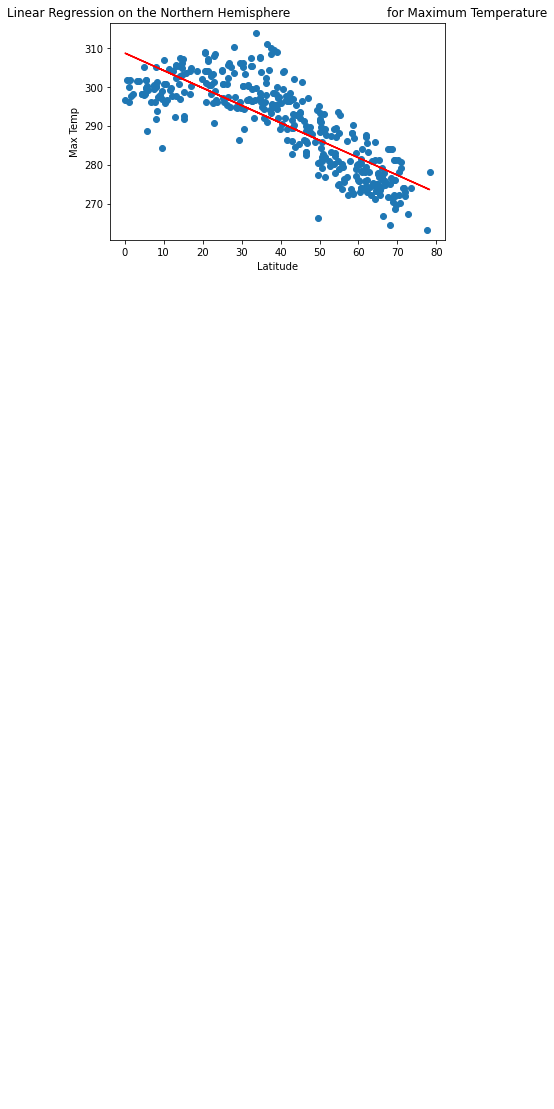

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

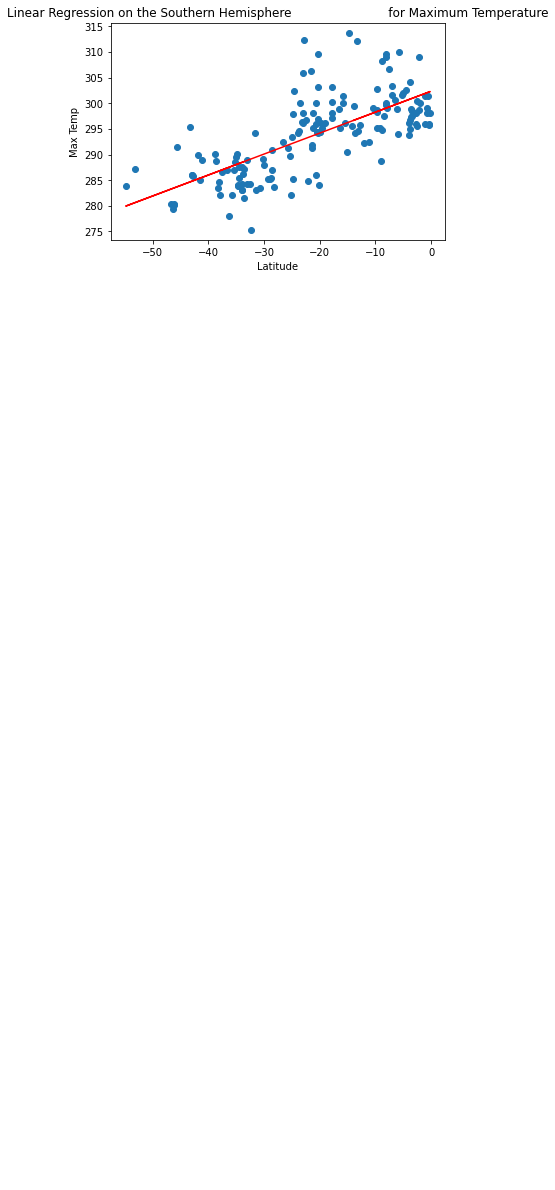

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

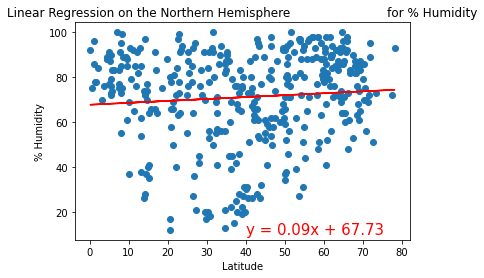

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

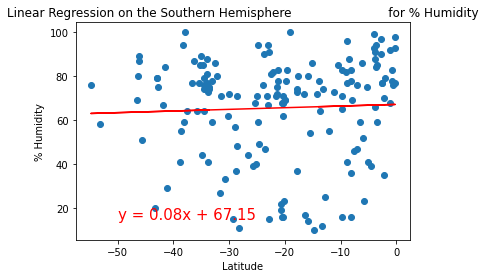

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

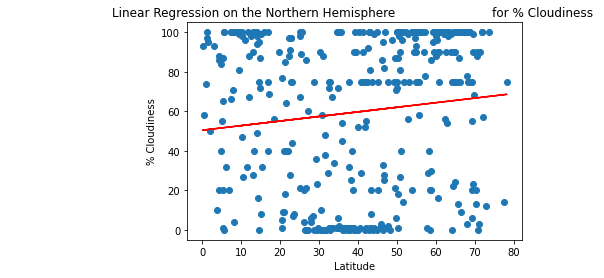

In [70]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness ', '% Cloudiness',(-50,60))

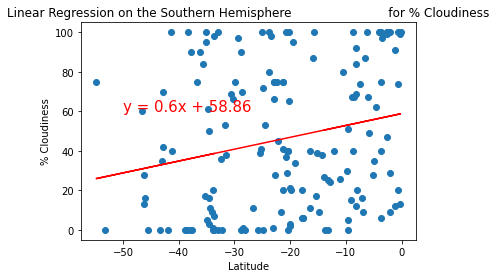

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

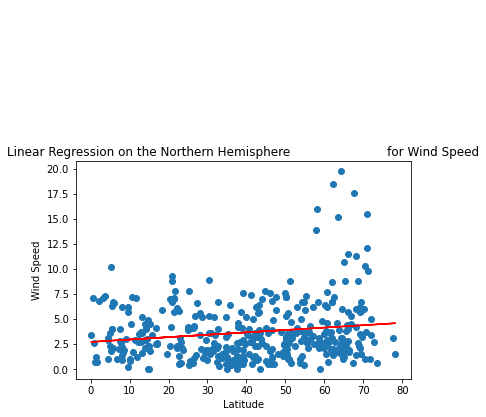

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

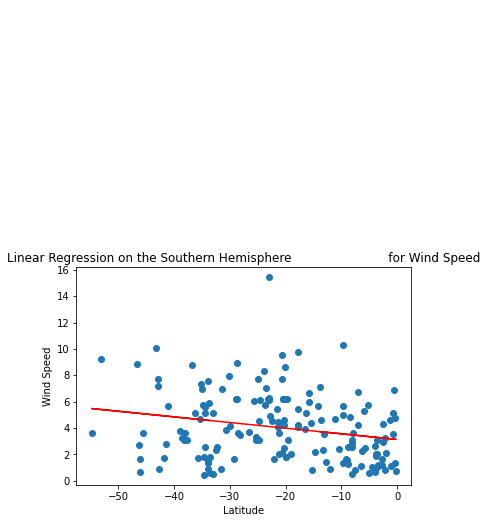

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))